In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from plots import *
import replacement_models as rm
import scaffolding

# For reloading modules from Jupyter
import importlib
importlib.reload(rm)

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

SAVE_DIR = '/plots/'

URL not formatted, defaulting to "Stage_database"
Connecting to database URL db


In [2]:
data = pd.read_csv('./processed_replacement_modeling_data.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'Mode_confirm', 'Replaced_mode', 'replaced_mode',
       'duration', 'distance_miles', 'start_local_dt_weekday',
       'available_modes', 'AGE', 'VEH', 'HHSIZE', 'CHILDREN', 'GENDER',
       'DRIVERS', 'user_id', '_id', 'month', 'cleaned_trip', 'start_fmt_time',
       'start_loc', 'end_loc', 'user_id_int', 'date_time', 'hour', 'WORKERS',
       'sin_time', 'cos_time', 'sin_month', 'cos_month', 'olat', 'olon',
       'dlat', 'dlon', 'is_weekend', 'is_male', 'purp_Home', 'purp_commute',
       'purp_discretionary', 'purp_pudo', 'purp_recreation',
       'purp_transit_transfer', 'hhinc_$25,000-$49,999',
       'hhinc_$50,000-$99,999', 'hhinc_Less than $24,999', 'student_Custodian',
       'student_Fire Fighter 2 Training', 'student_Not a student',
       'student_Taking prerequisites missing for grad program ',
       'student_Work at csu', 'student_Yes - Full Time College/University',
       'student_Yes - Part-Time College/University',
       'student_Yes - Vocati

In [4]:
choice_col = 'Replaced_mode_num'
feature_list = ['Mode_confirm_num',
                'hhinc_$25,000-$49,999',
                'hhinc_$50,000-$99,999',
                'hhinc_Less than $24,999',
                'purp_Home',
                'purp_commute',
                'purp_discretionary',
                'purp_pudo',
                'purp_recreation',
                'purp_transit_transfer',
                'AGE',
                'VEH',
                'HHSIZE',
                'is_male',
                'sin_time',
                'cos_time',
                'sin_month',
                'cos_month',
                'is_weekend',
                'duration',
                'distance_miles',
                'av_car',
                'av_s_car',
                'av_ebike',
                'av_p_micro',
                'av_s_micro',
                'av_ridehail',
                'av_transit',
                'av_walk']

In [5]:
# Set up K-fold cross validation
kf = KFold(n_splits=3)

# Collect all scores to show at end of modeling
score_results = {}
score_results_holdout = {}

In [6]:
# Set up holdout users
all_users = pd.unique(data['user_id'])
holdout_users = np.random.choice(all_users, 10)
holdout_data = data[data['user_id'].isin(holdout_users)]
non_holdout_data = data[~data['user_id'].isin(holdout_users)]

# Random Forest

### Test on All Users

Accuracy: 0.5885974633665806
F1: 0.5538667647496393


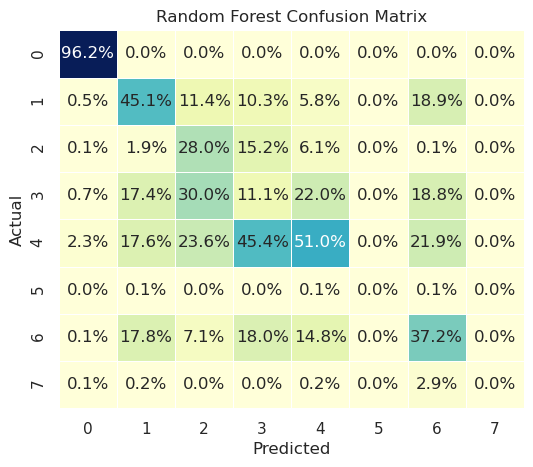

In [7]:
# Train and test model
rf, accuracy, f1, confusion = rm.rf(data, choice_col, feature_list, kf)

# Save scores for model comparison
score_results['rf'] = (np.mean(accuracy), np.mean(f1))
print(f"Accuracy: {np.mean(accuracy)}")
print(f"F1: {np.mean(f1)}")

# Average and plot the confusion matrices
confusion_mean = np.mean(np.array(confusion), axis=0)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_mean, annot=True, fmt='.1%', cmap='YlGnBu', linewidths=.5, cbar=False).set(title='Random Forest Confusion Matrix', xlabel='Predicted', ylabel='Actual')
plt.subplots_adjust(bottom=0.25)

### Test on Holdout Users

In [8]:
# Train and test model
rf, accuracy, f1, confusion = rm.rf(non_holdout_data, choice_col, feature_list, kf)

holdout_true = holdout_data[choice_col].values
holdout_pred = rf.predict(holdout_data[feature_list].values)

accuracy = sklearn.metrics.accuracy_score(holdout_true, holdout_pred)
f1 = sklearn.metrics.f1_score(holdout_true, holdout_pred, average='weighted')
score_results_holdout['rf'] = (np.mean(accuracy), np.mean(f1))

print(f"Holdout Accuracy: {accuracy}")
print(f"Holdout F1: {f1}")

Holdout Accuracy: 0.5725506407606449
Holdout F1: 0.6094616857733819


# GBDT

### Test on All Users

Accuracy: 0.5955342117144852
F1: 0.5640399110466204


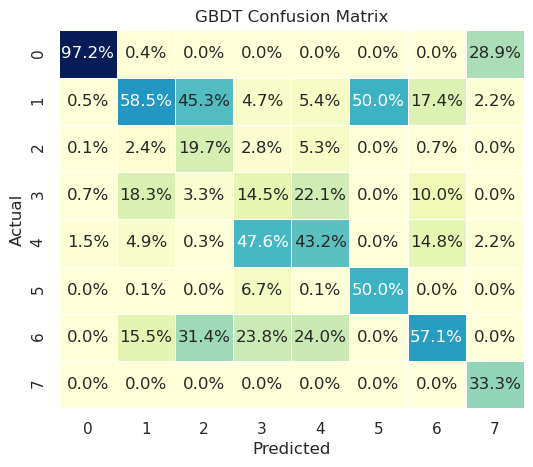

In [9]:
# Train and test model
rf, accuracy, f1, confusion = rm.gbdt(data, choice_col, feature_list, kf)

# Save scores for model comparison
score_results['gbdt'] = (np.mean(accuracy), np.mean(f1))
print(f"Accuracy: {np.mean(accuracy)}")
print(f"F1: {np.mean(f1)}")

# Average and plot the confusion matrices
confusion_mean = np.mean(np.array(confusion), axis=0)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_mean, annot=True, fmt='.1%', cmap='YlGnBu', linewidths=.5, cbar=False).set(title='GBDT Confusion Matrix', xlabel='Predicted', ylabel='Actual')
plt.subplots_adjust(bottom=0.25)

### Test on Holdout Users

In [10]:
# Train and test model
gbdt, accuracy, f1, confusion = rm.gbdt(non_holdout_data, choice_col, feature_list, kf)

holdout_true = holdout_data[choice_col].values
holdout_pred = gbdt.predict(holdout_data[feature_list].values)

accuracy = sklearn.metrics.accuracy_score(holdout_true, holdout_pred)
f1 = sklearn.metrics.f1_score(holdout_true, holdout_pred, average='weighted')
score_results_holdout['gbdt'] = (np.mean(accuracy), np.mean(f1))

print(f"Holdout Accuracy: {accuracy}")
print(f"Holdout F1: {f1}")

Holdout Accuracy: 0.5820587019429516
Holdout F1: 0.6195222020283363


# SVM

### Test on All Users

Accuracy: 0.5118006813610804
F1: 0.5120185939591094


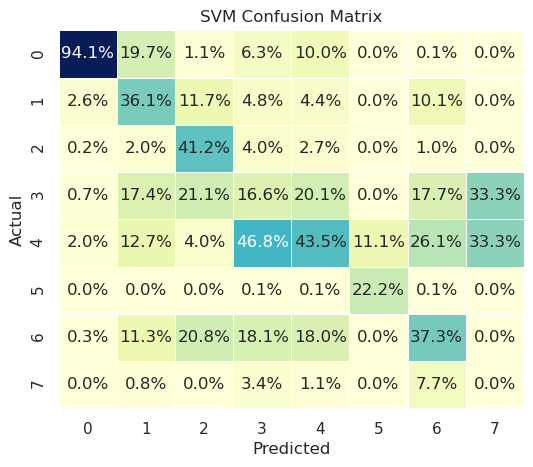

In [11]:
# Train and test model
rf, accuracy, f1, confusion = rm.svm(data, choice_col, feature_list, kf)

# Save scores for model comparison
score_results['svm'] = (np.mean(accuracy), np.mean(f1))
print(f"Accuracy: {np.mean(accuracy)}")
print(f"F1: {np.mean(f1)}")

# Average and plot the confusion matrices
confusion_mean = np.mean(np.array(confusion), axis=0)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_mean, annot=True, fmt='.1%', cmap='YlGnBu', linewidths=.5, cbar=False).set(title='SVM Confusion Matrix', xlabel='Predicted', ylabel='Actual')
plt.subplots_adjust(bottom=0.25)

### Test on Holdout Users

In [12]:
# Train and test model
svm, accuracy, f1, confusion = rm.svm(non_holdout_data, choice_col, feature_list, kf)

holdout_true = holdout_data[choice_col].values
holdout_pred = svm.predict(holdout_data[feature_list].values)

accuracy = sklearn.metrics.accuracy_score(holdout_true, holdout_pred)
f1 = sklearn.metrics.f1_score(holdout_true, holdout_pred, average='weighted')
score_results_holdout['svm'] = (np.mean(accuracy), np.mean(f1))

print(f"Holdout Accuracy: {accuracy}")
print(f"Holdout F1: {f1}")

Holdout Accuracy: 0.6126498553121125
Holdout F1: 0.4654945324647785


# K Nearest Neighbors

### Test on All Users

Accuracy: 0.41801091819562447
F1: 0.41276428661729075


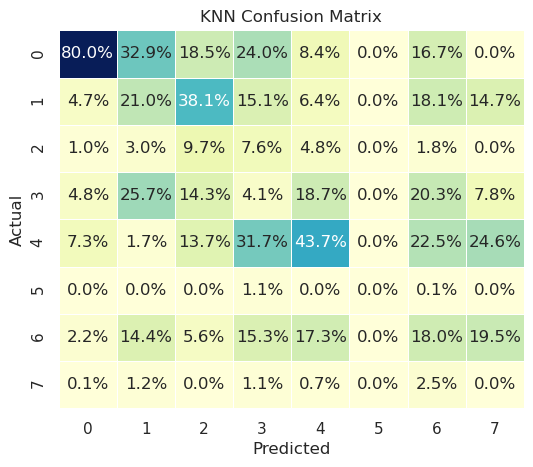

In [13]:
# Train and test model
knn, accuracy, f1, confusion = rm.knn(data, choice_col, feature_list, kf)

# Save scores for model comparison
score_results['knn'] = (np.mean(accuracy), np.mean(f1))
print(f"Accuracy: {np.mean(accuracy)}")
print(f"F1: {np.mean(f1)}")

# Average and plot the confusion matrices
confusion_mean = np.mean(np.array(confusion), axis=0)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_mean, annot=True, fmt='.1%', cmap='YlGnBu', linewidths=.5, cbar=False).set(title='KNN Confusion Matrix', xlabel='Predicted', ylabel='Actual')
plt.subplots_adjust(bottom=0.25)

### Test on Holdout Users

In [14]:
# Train and test model
knn, accuracy, f1, confusion = rm.knn(non_holdout_data, choice_col, feature_list, kf)

holdout_true = holdout_data[choice_col].values
holdout_pred = knn.predict(holdout_data[feature_list].values)

accuracy = sklearn.metrics.accuracy_score(holdout_true, holdout_pred)
f1 = sklearn.metrics.f1_score(holdout_true, holdout_pred, average='weighted')
score_results_holdout['knn'] = (np.mean(accuracy), np.mean(f1))

print(f"Holdout Accuracy: {accuracy}")
print(f"Holdout F1: {f1}")

Holdout Accuracy: 0.4799503927242662
Holdout F1: 0.44986923712658866


# Model Comparison

In [15]:
# Overall results
accuracy_all = pd.DataFrame(pd.DataFrame(score_results).iloc[0,:]).reset_index()
accuracy_all.columns = ['Model','Score']
accuracy_all['Type'] = 'All'
f1_all = pd.DataFrame(pd.DataFrame(score_results).iloc[1,:]).reset_index()
f1_all.columns = ['Model','Score']
f1_all['Type'] = 'All'
score_results

{'rf': (0.5885974633665806, 0.5538667647496393),
 'gbdt': (0.5955342117144852, 0.5640399110466204),
 'svm': (0.5118006813610804, 0.5120185939591094),
 'knn': (0.41801091819562447, 0.41276428661729075)}

In [16]:
# Overall results
accuracy_holdout = pd.DataFrame(pd.DataFrame(score_results_holdout).iloc[0,:]).reset_index()
accuracy_holdout.columns = ['Model','Score']
accuracy_holdout['Type'] = 'Holdout'
f1_holdout = pd.DataFrame(pd.DataFrame(score_results_holdout).iloc[1,:]).reset_index()
f1_holdout.columns = ['Model','Score']
f1_holdout['Type'] = 'Holdout'
score_results_holdout

{'rf': (0.5725506407606449, 0.6094616857733819),
 'gbdt': (0.5820587019429516, 0.6195222020283363),
 'svm': (0.6126498553121125, 0.4654945324647785),
 'knn': (0.4799503927242662, 0.44986923712658866)}

In [20]:
accuracy = pd.concat([accuracy_all, accuracy_holdout])
f1 = pd.concat([f1_all, f1_holdout])

[Text(0.5, 1.0, 'Accuracy')]

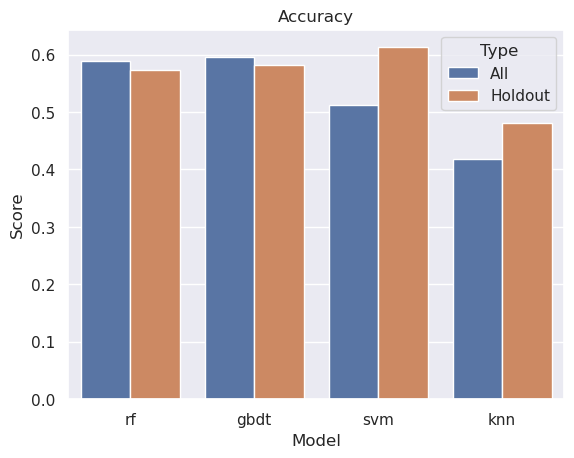

In [18]:
sns.barplot(data=accuracy, x='Model', y='Score', hue='Type').set(title='Accuracy')

[Text(0.5, 1.0, 'F1')]

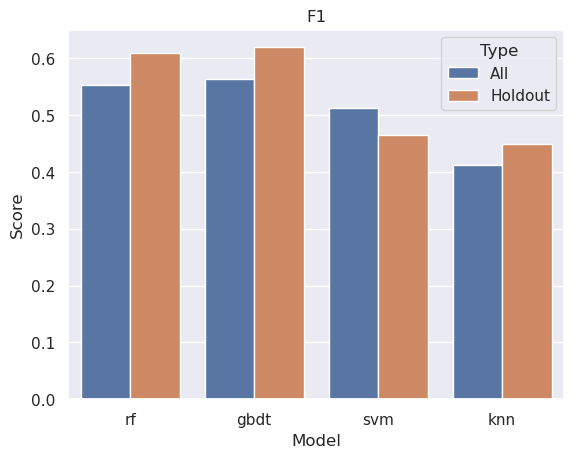

In [21]:
sns.barplot(data=f1, x='Model', y='Score', hue='Type').set(title='F1')